#Початок роботи
Імпортування бібліотек

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

Розподіл на тренувальні та тестові дані

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

170498071/170498071 [==============================] - 481s 3us/step


Виведення випадкових зображень

In [3]:
id2class = {
    idx: name for idx, name in enumerate([
        'airplane', 'automobile', 'bird',
        'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'
    ])
}

def display_cifar_images(
    x: np.ndarray,
    y: np.ndarray,
    id2class: dict[int, str],
    n: int = 4
):
    random_images_indices = np.random.randint(0, x.shape[0], n)
    images = x[random_images_indices]
    classes = [id2class[y[idx, 0]] for idx in random_images_indices]


    f, axs = plt.subplots(1, n, figsize=((3*n, 3)))
    for image, name, ax in zip(images, classes, axs):
        ax.imshow(image)
        ax.axis('off')
        ax.set(title=f"Class: {name}")
    plt.show()

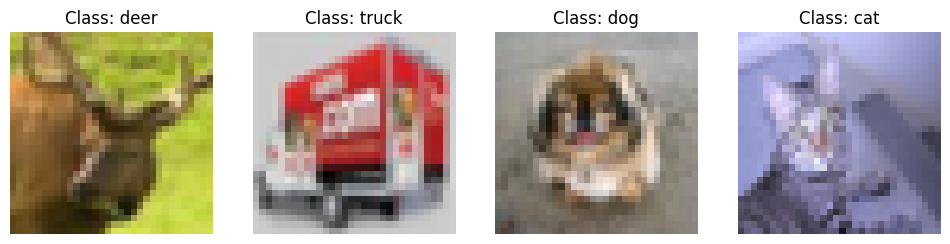

In [4]:
display_cifar_images(x_train, y_train, id2class)

#Створення моделі (з методички)

In [5]:
def construct_model(input_shape: tuple[int,...], dim_per_layer: list[int], n_classes: int):
    input_x = layers.Input(shape=input_shape)


    x = layers.Flatten()(input_x)
    for dim in dim_per_layer:
        x = layers.Dense(dim, activation='relu')(x)

    out_x = layers.Dense(n_classes, activation = 'softmax')(x)


    return tf.keras.Model(inputs=input_x, outputs=out_x)


model = construct_model((32,32,3), dim_per_layer=[100, 100], n_classes=len(id2class))

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 318410 (1.21 MB)
Trainable params: 318410 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
    # спарс версія оскільки y_train та y_test містять номери класів
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Тренування моделі

In [8]:
hist = model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 [==============================] - 4s 5ms/step - loss: 2.0461 - accuracy: 0.2663 - val_loss: 1.9082 - val_accuracy: 0.3265
Epoch 2/100
391/391 [==============================] - 1s 4ms/step - loss: 1.8486 - accuracy: 0.3508 - val_loss: 1.7990 - val_accuracy: 0.3691
Epoch 3/100
391/391 [==============================] - 1s 4ms/step - loss: 1.7773 - accuracy: 0.3750 - val_loss: 1.7493 - val_accuracy: 0.3859
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7291 - accuracy: 0.3919 - val_loss: 1.7201 - val_accuracy: 0.3901
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 1.6908 - accuracy: 0.4058 - val_loss: 1.6688 - val_accuracy: 0.4117
Epoch 6/100
391/391 [==============================] - 1s 4ms/step - loss: 1.6614 - accuracy: 0.4153 - val_loss: 1.6504 - val_accuracy: 0.4185
Epoch 7/100
391/391 [==============================] - 1s 4ms/step - loss: 1.6354 - accuracy: 0.4243 - val_loss: 1.6217 - val_accuracy: 0.4278
Epoch 8/100

In [ ]:
hist.history

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4184 - accuracy: 0.5191


In [11]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred_uint8 = np.argmax(y_pred, axis=1).astype(np.uint8)

#Аналіз результатів

Accuracy and loss function plot

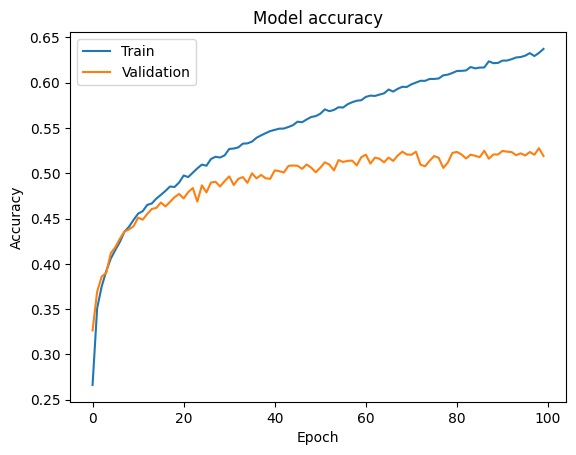

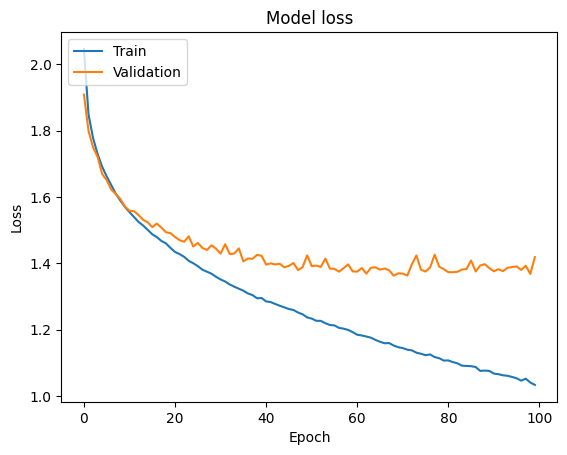

In [13]:
def plot_learning_curve(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_learning_curve(hist)

Classification report

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred_uint8))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1000
           1       0.67      0.61      0.64      1000
           2       0.46      0.34      0.39      1000
           3       0.32      0.35      0.33      1000
           4       0.51      0.38      0.43      1000
           5       0.37      0.54      0.44      1000
           6       0.54      0.63      0.58      1000
           7       0.52      0.62      0.57      1000
           8       0.68      0.62      0.65      1000
           9       0.60      0.53      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



Confusion matrix

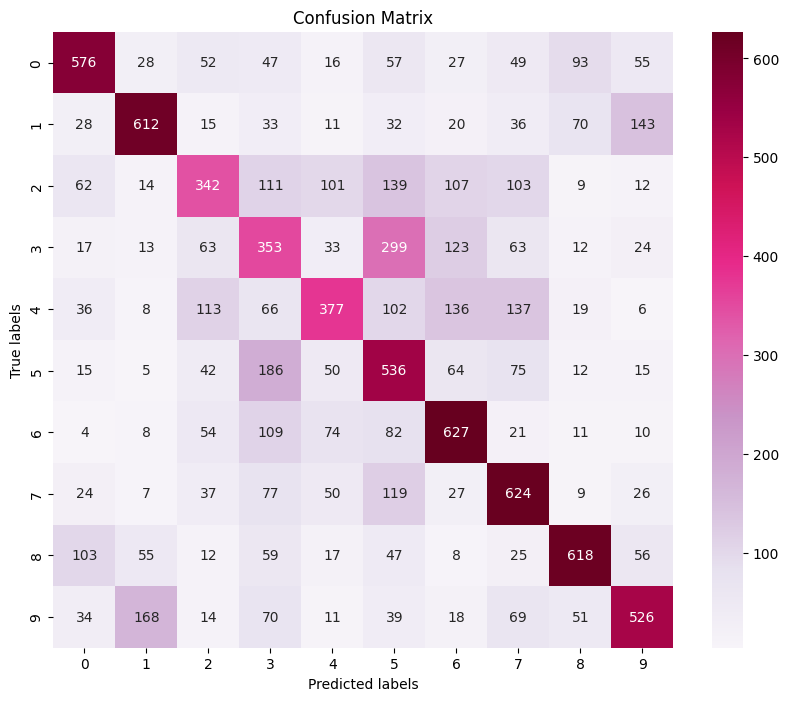

In [15]:
cm = confusion_matrix(y_test, y_pred_uint8)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Створення власної моделі

In [82]:
model2 = construct_model((32,32,3), dim_per_layer=[1024, 1024], n_classes=len(id2class))
#Порередні спроби
#model2 = construct_model((32,32,3), dim_per_layer=[256, 256, 128], n_classes=len(id2class)) #-best 53%
#model2 = construct_model((32,32,3), dim_per_layer=[256, 256], n_classes=len(id2class)) #-best 53,7%
#model2 = construct_model((32,32,3), dim_per_layer=[512, 512], n_classes=len(id2class)) #-best 54,9%
#model2 = construct_model((32,32,3), dim_per_layer=[256, 128], n_classes=len(id2class))

In [83]:
model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Тренування моделі

In [ ]:
hist2 = model2.fit(
    x=x_train,
    y=y_train,
    epochs=60,
    batch_size=128,
    validation_data=(x_test, y_test)
)

In [95]:
model2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_41 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_42 (Dense)            (None, 10)                10250     
                                                                 
Total params: 4206602 (16.05 MB)
Trainable params: 4206602 (16.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3401 - accuracy: 0.5545


In [90]:
y_pred_2 = model2.predict(x_test)
y_pred2_uint8 = np.argmax(y_pred_2, axis=1).astype(np.uint8)

313/313 [==============================] - 1s 2ms/step


#Аналіз результатів

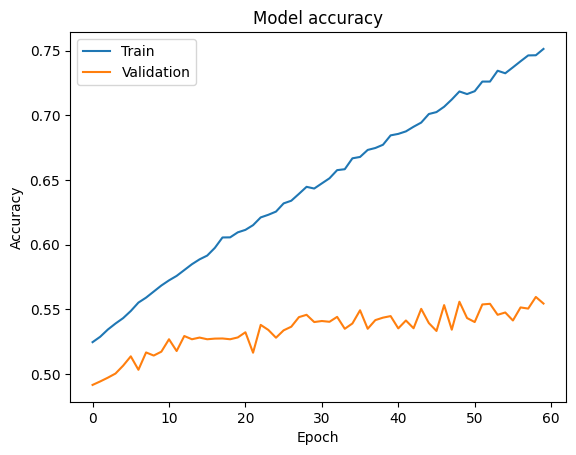

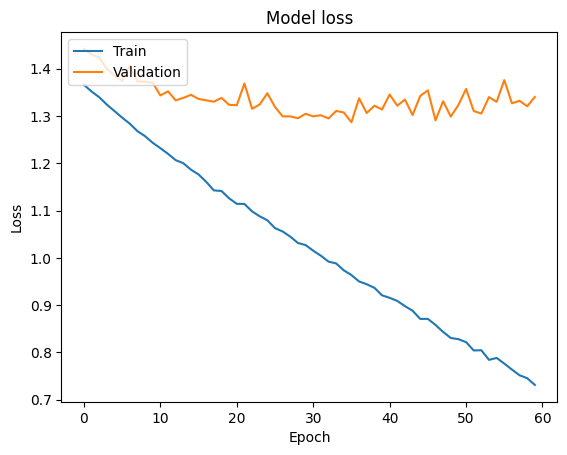

In [91]:
plot_learning_curve(hist2)

In [92]:
print("Classification Report:")
print(classification_report(y_test, y_pred2_uint8))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63      1000
           1       0.72      0.58      0.64      1000
           2       0.45      0.46      0.46      1000
           3       0.46      0.28      0.35      1000
           4       0.45      0.54      0.49      1000
           5       0.57      0.35      0.44      1000
           6       0.59      0.62      0.60      1000
           7       0.54      0.69      0.61      1000
           8       0.70      0.65      0.68      1000
           9       0.53      0.69      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



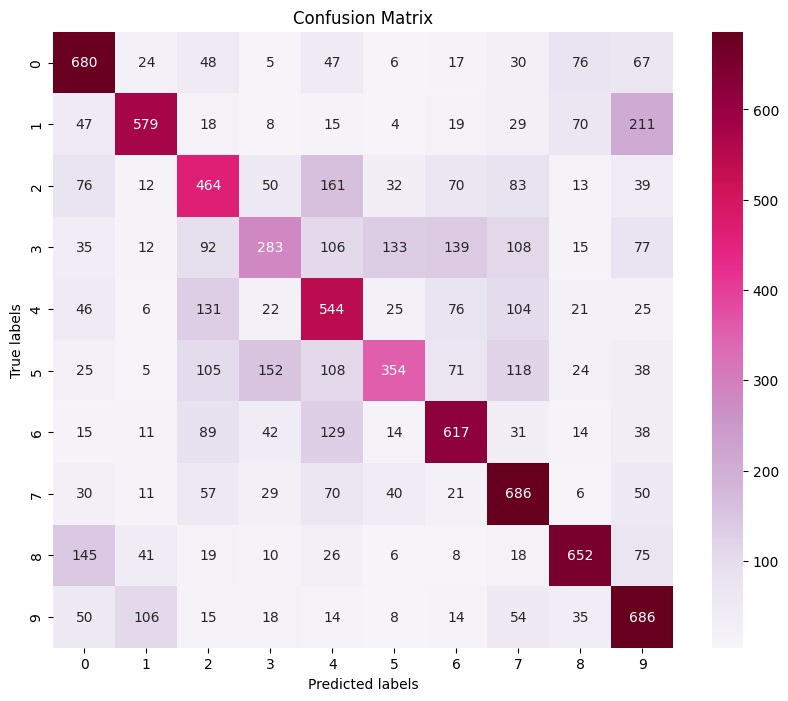

In [93]:
cm2 = confusion_matrix(y_test, y_pred2_uint8)

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='PuRd', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Тестування моделі на нових зображеннях
Новi зображення завантажено у середовище Colab

Розроблено функцію обробки зображень

In [130]:
import cv2

def img_prep(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (32, 32))
  img = img / 255.0
  return img

img_paths = ['cat__test.png', 'deer_test.jpg', 'horse_test.jpg']
img_test = [img_prep(path) for path in img_paths]

Передбачення класів моделлю

In [131]:
predictions = [model2.predict(np.expand_dims(image, axis=0)) for image in img_test]

1/1 [==============================] - 0s 16ms/step


Перетворення та виведення результатів

In [132]:
classes = [np.argmax(prediction) for prediction in predictions]
classes

[3, 2, 8]

In [133]:
for i in classes:
  print(id2class[i])

cat
bird
ship


Модель помилилася у визначенні зображення коня та оленя